In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil

from textwrap import wrap

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
profile = data["Q17[SQ001]"].str.strip().fillna(value="No answer").value_counts(dropna=False)
profile_percentage = data["Q17[SQ001]"].str.strip().fillna(value="No answer").value_counts(normalize=True, dropna=False) * 100

order = [
    "1 - I cannot understand it at all",
    "2 - I can understand very little of it",
    "3 - I understand something of it",
    "4 - I can understand most of it",
    "5 - I completely understand it",
    "No answer"
]
profile = profile.reindex(order).fillna(value=0)
profile_percentage = profile_percentage.reindex(order).fillna(value=0)

print "Data:"
print profile
print ""
print "Data %:"
print profile_percentage

Data:
1 - I cannot understand it at all         1.0
2 - I can understand very little of it    0.0
3 - I understand something of it          3.0
4 - I can understand most of it           3.0
5 - I completely understand it            0.0
No answer                                 1.0
Name: Q17[SQ001], dtype: float64

Data %:
1 - I cannot understand it at all         12.5
2 - I can understand very little of it     0.0
3 - I understand something of it          37.5
4 - I can understand most of it           37.5
5 - I completely understand it             0.0
No answer                                 12.5
Name: Q17[SQ001], dtype: float64


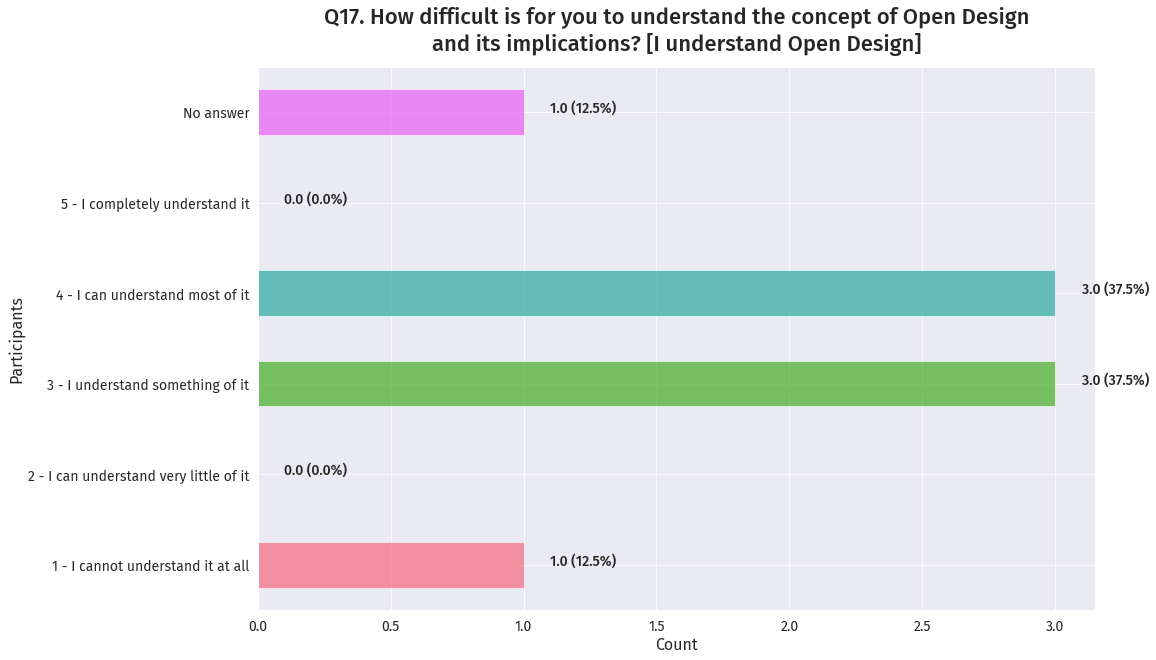

In [5]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Plot the data
plt.figure(figsize=(8,6))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Participants', fontsize=16)
title = "Q17. How difficult is for you to understand the concept of Open Design and its implications? [I understand Open Design]"
plt.title("\n".join(wrap(title, 70)), fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")
my_colors = sns.color_palette("husl", len(profile)) # Set color palette
profile.plot(kind='barh', color=my_colors, alpha=0.75, rot=0, figsize=(15,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i, v in enumerate(profile):
    plt.text(v + .1, i, str(v)+" ("+str(profile_percentage[i])+"%)", fontweight='500', fontsize=14)
plt.savefig("svg/Q17.svg", bbox_inches="tight")
plt.savefig("png/Q17.png", dpi=300, bbox_inches="tight")